Monday, 28th October 2019 -- Biko Pougala

This notebook is concerned with generate cumulative distribution functions, both Gaussian and Poisson, that could be used in order to generate copulas.

In [14]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt

What we wish to accomplish is generate a Gaussian copula from artificially generated data. In order to do that we'll follow the following steps:

1) Generate a multivariate normal distribution  
2) Get the cumulative distribution at every point  
3) Get the inverse of the CDF to get the points X 

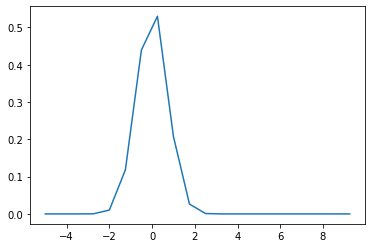

In [18]:
#Generate the multivariate normal distribution using SciPy

x = np.linspace(-5, 10, 20, endpoint=False)
y = multivariate_normal.pdf(x, mean=0, cov=0.5)
plt.plot(x, y)

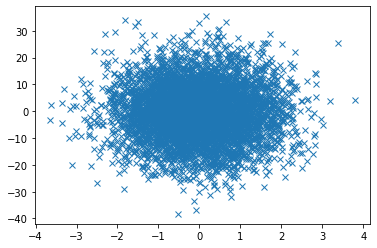

In [19]:
# Generate the multivariate normal distribution using Numpy (multidimensional case)
mean = [0, 0]
cov = [[1, 0], [0, 100]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')

In [ ]:
# Step 2: Compute the CDF 